<a href="https://colab.research.google.com/github/SoarAway/mlpc/blob/main/MLPC_Indv_ver6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importing dataset
DATA_DIR_REAL ="/content/True.csv"
df_real = pd.read_csv(DATA_DIR_REAL, header = 0)

DATA_DIR_FAKE ="/content/Fake.csv"
df_fake = pd.read_csv(DATA_DIR_FAKE, header = 0)

# Chapter 3 - EDA

In [ ]:
# Dataset Information - Real Dataset
print("Real News Dataset Information\n")
print(df_real.info())
print()
print(f"Number of rows: {df_real.shape[0]}")
print(f"Number of columns: {df_real.shape[1]}")
print()
display(df_real.head())

Real News Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

Number of rows: 21417
Number of columns: 4



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Dataset Information - Fake Dataset
print("Fake News Dataset Information\n")
print(df_fake.info())
print()
print(f"Number of rows: {df_fake.shape[0]}")
print(f"Number of columns: {df_fake.shape[1]}")
print()
display(df_fake.head())

Fake News Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

Number of rows: 23481
Number of columns: 4



,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# Subject Categories - Listing
print("Real News Dataset Subject Category")
print(df_fake['subject'].value_counts())

print()
print("Fake News Dataset Subject Categories")
print(df_real['subject'].value_counts())

Real News Dataset Subject Category
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

Fake News Dataset Subject Categories
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


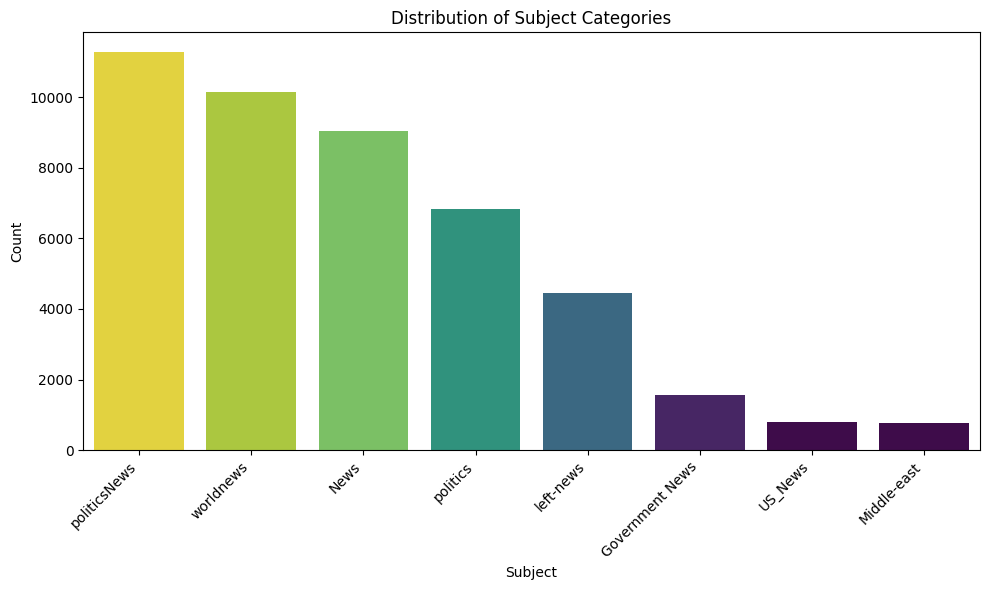

In [ ]:
# Subject Categories - Bar Plot
subject_counts = pd.concat([df_real, df_fake], ignore_index=True)['subject'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis',hue=subject_counts.values, legend=False)
plt.title('Distribution of Subject Categories')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

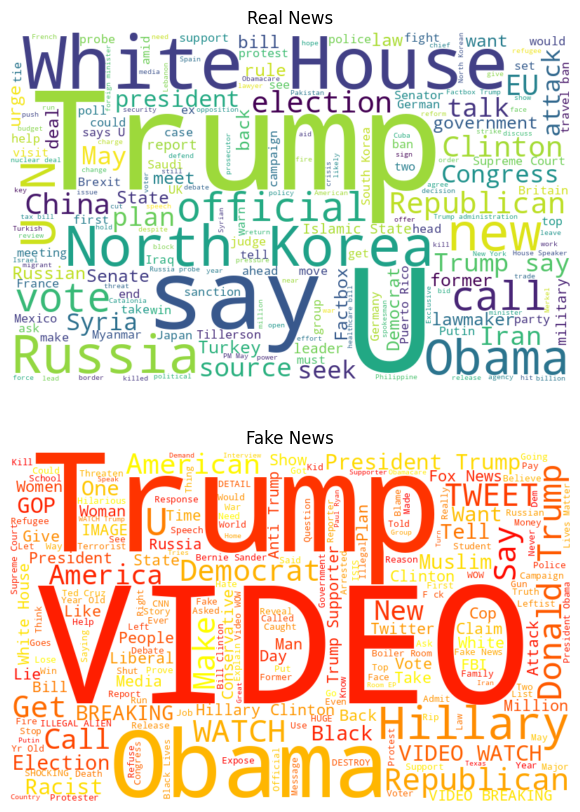

In [74]:
# Generating Word Cloud
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))
real_news = ' '.join(df_real['text'])
real_news = ' '.join(df_real['title'])
fake_news = ' '.join(df_fake['text'])
fake_news = ' '.join(df_fake['title'])

wordcloud_real = WordCloud(
    width=800,
    height=500,
    background_color='white',
    stopwords=stop_words
).generate(real_news)

wordcloud_fake = WordCloud(
    width=800,
    height=500,
    background_color='white',
    colormap='autumn',
    stopwords=stop_words
).generate(fake_news)

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].imshow(wordcloud_real, interpolation='bilinear')
ax[0].set_title('Real News')
ax[0].axis('off')

ax[1].imshow(wordcloud_fake, interpolation='bilinear')
ax[1].set_title('Fake News')
ax[1].axis('off')

plt.show()

In [ ]:
# Text Statistitcs
text_word_counts = pd.concat([df_real, df_fake])['text'].str.split().str.len()

print(f"Max word count: {text_word_counts.max()} words")
print(f"Min word count: {text_word_counts.min()} words")
print(f"Average word count: {text_word_counts.mean():.2f} words")
print("\nFull description of text word counts:")
print(text_word_counts.describe())

In [ ]:
import collections
from collections import Counter

all_words = [word for sentence in pd.concat([df_real, df_fake])['text'] for word in str(sentence).lower().split()]
word_counts = Counter(all_words)

df_top_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_top_words, palette='rocket')
plt.title('Top 20 Most Common Words in the Dataset')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [ ]:
# EDA - identifying missing values
print("Missing Data : ")
print(df.isna().sum())

# EDA - identifying duplicated rows
print("\nDuplicated Data :")
print(df.duplicated(subset=['text']).sum(), "rows")

Missing Data : 
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Duplicated Data :
6271 rows


# Chapter 4 - Data Preprocessing

In [ ]:
# Combining both files & one hot encoding
df_real['label'] = 0
df_fake['label'] = 1
df = pd.concat([df_real, df_fake], ignore_index=True)

In [ ]:
# Removing Indicators
import string
import re

def remove_indicators(text):
  # Remove Clickbait title (WATCH:)
  text = re.sub(r'^[A-Z\s]+:', '', text).strip()
  # Remove (Reuters)
  text = re.sub(r'\(Reuters\)', '', text).strip()
  # Remove location (WASHINGTON -)
  text = re.sub(r'^[A-Z\s/]+-\s*', '', text).strip()
  return text

df['title'] = df['title'].apply(remove_indicators)
df['text'] = df['text'].apply(remove_indicators)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",0


In [ ]:
# Pre-processing - text cleaning
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import contractions

stop_words = set(stopwords.words('english'))
stopword_list = ['one', 'two','said', 'us', 'also']
stop_words.update(stopword_list)

lemmatizer = WordNetLemmatizer()

# POS Tagging helper function
def pos_tagging(text):
    if text.startswith('J'):
        return wordnet.ADJ
    elif text.startswith('V'):
        return wordnet.VERB
    elif text.startswith('N'):
        return wordnet.NOUN
    elif text.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove username
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Expand contractions
    text = contractions.fix(text)
    # POS tagging
    tokens = word_tokenize(text)
    pos_tagged_tokens = nltk.pos_tag(tokens)
    # Lemmatization
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, pos_tagging(pos_tag))
        for word, pos_tag in pos_tagged_tokens
    ]
    return ' '.join(lemmatized_tokens)

# Applying the cleaning function
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

display(df.head())

,title,text,subject,date,label
0,budget fight loom republican flip fiscal script,head conservative republican faction congress ...,politicsNews,"December 31, 2017",0
1,military accept transgender recruit monday pen...,transgender people allow first time enlist mil...,politicsNews,"December 29, 2017",0
2,senior republican senator let mr mueller job,special counsel investigation link russia pres...,politicsNews,"December 31, 2017",0
3,fbi russia probe help australian diplomat tipo...,trump campaign adviser george papadopoulos tel...,politicsNews,"December 30, 2017",0
4,trump want postal service charge much amazon s...,president donald trump call postal service fri...,politicsNews,"December 29, 2017",0


In [49]:
# Removing Duplicates
df = df.drop_duplicates(subset=['text'], keep='first')

print("Distribution of ")
print(df['label'].value_counts())

Distribution of 
label
0    21189
1    17432
Name: count, dtype: int64


In [50]:
# TF IDF
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

x = df[['text', 'title']]
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=5000), 'text'),
        ('title', TfidfVectorizer(stop_words='english', max_features=2000), 'title')
    ],
    remainder='drop'
)

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

# Chapter 5 & 6 : Model Selection & Training

Logistics Regression

In [57]:
from sklearn.linear_model import LogisticRegression

# Logistics Regression
logi_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logi_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Decision Tree

In [56]:
from sklearn import tree

# Decision Tree
dt_model = tree.DecisionTreeClassifier(criterion='gini',random_state =42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Random Forest

In [54]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Step 1: Data Preparation

# Shuffling dataset
df_shuffled = shuffle(df, random_state=42)

# Initializing the dependant and independant variable
x = df_shuffled.drop('label', axis=1)
y = df_shuffled['label'].values

# Pareto Theory (80 20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Parameters for tokenization and padding
vocab_size = 10000 # considering the most common 10000 words
embedding_dim = 128 # dimension of the word embeddings
max_length = 250 # maximum length of sequences
trunc_type = 'post' # truncate sequences after max_length
padding_type = 'post' # pad sequences after max_length
oov_tok = "<OOV>" # token for out-of-vocabulary words

# Initialize and fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train['text'])

# Convert text to sequences of integers
training_sequences = tokenizer.texts_to_sequences(x_train['text'])
testing_sequences = tokenizer.texts_to_sequences(x_test['text'])

# Pad the sequences
x_train_lstm = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test_lstm = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert labels to numpy arrays
y_train_lstm = np.array(y_train)
y_test_lstm = np.array(y_test)

print("Data preparation for LSTM complete.")
print(f"Training sequences shape: {x_train_lstm.shape}")
print(f"Testing sequences shape: {x_test_lstm.shape}")
print(f"Training labels shape: {y_train_lstm.shape}")
print(f"Testing labels shape: {y_test_lstm.shape}")

Data preparation for LSTM complete.
Training sequences shape: (35918, 250)
Testing sequences shape: (8980, 250)
Training labels shape: (35918,)
Testing labels shape: (8980,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Step 2: Model Building

# Define the LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True), # You can experiment with the number of units
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid') # Binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Step 3: Model Training

num_epochs = 10 # You can experiment with the number of epochs

history = model.fit(x_train_lstm, y_train_lstm, epochs=num_epochs, validation_data=(x_test_lstm, y_test_lstm), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6445 - loss: 0.6305 - val_accuracy: 0.6733 - val_loss: 0.5752
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8780 - loss: 0.3128 - val_accuracy: 0.9726 - val_loss: 0.0841
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.9774 - loss: 0.0748 - val_accuracy: 0.9869 - val_loss: 0.0456
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9915 - loss: 0.0334 - val_accuracy: 0.9916 - val_loss: 0.0339
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9959 - loss: 0.0166 - val_accuracy: 0.9924 - val_loss: 0.0317
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9969 - loss: 0.0126 - val_accuracy: 0.9930 - val_loss: 0.0304
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9925 - val_loss: 0.0376
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9990 -

In [ ]:
import pandas as pd


new_samples = [
    "A senior administration official confirmed this Friday that the recently announced trade tariffs are scheduled for implementation starting next month, impacting several key industries.",
    "Insiders have just revealed a secret meeting that took place where top celebrities gathered to decide the next election. You won't believe who was there!",
    "Legislators are currently debating a new infrastructure bill, with sources on both sides of the aisle expressing cautious optimism about reaching a compromise before the upcoming recess.",
    "This one simple trick discovered by a mom in Ohio can reportedly cure the common cold in just a few hours, and it's a secret the big pharmaceutical companies don't want you to know.",
    "The latest approval ratings are a disaster for the current leadership. It's clear that the people have had enough of the empty promises and are ready for a real change."
]

predict_df = pd.DataFrame({
    'text': new_samples,
    'title': ['' for _ in new_samples],
    'location': ['N/A' for _ in new_samples]
})

# 2. Preprocess the data using the fitted preprocessor
X_processed = preprocessor.transform(predict_df)

# 3. Get both the predicted classes and the probabilities
predictions = logi_model.predict(X_processed)
probabilities = logi_model.predict_proba(X_processed)


# 4. Loop through the results efficiently and display them
print("--- Prediction Results ---")
for index, sample in enumerate(new_samples):
    pred_class = predictions[index]
    pred_label = "Fake" if pred_class == 1 else "Real"
    confidence = probabilities[index][pred_class] * 100

    print(f"Sample: \"{sample[:70]}...\"")
    print(f"-> Prediction: {pred_label} (Confidence: {confidence:.2f}%)\n")

--- Prediction Results ---
Sample: "A senior administration official confirmed this Friday that the recent..."
-> Prediction: Real (Confidence: 87.95%)

Sample: "Insiders have just revealed a secret meeting that took place where top..."
-> Prediction: Fake (Confidence: 67.25%)

Sample: "Legislators are currently debating a new infrastructure bill, with sou..."
-> Prediction: Fake (Confidence: 50.94%)

Sample: "This one simple trick discovered by a mom in Ohio can reportedly cure ..."
-> Prediction: Fake (Confidence: 85.31%)

Sample: "The latest approval ratings are a disaster for the current leadership...."
-> Prediction: Fake (Confidence: 64.55%)



# Chapter 8 - Performance Metrics

Classification Report

In [71]:
# Classification Report (Logistics Regression)
y_pred_logi = logi_model.predict(x_test)
print("Logistics Regression - Classification Report:")
print(classification_report(y_test, y_pred_logi))

Logistics Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4217
           1       0.99      0.98      0.98      3508

    accuracy                           0.98      7725
   macro avg       0.98      0.98      0.98      7725
weighted avg       0.98      0.98      0.98      7725



In [72]:
# Classification Report (Decision Tree)
y_pred_dt = dt_model.predict(x_test)
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4217
           1       0.93      0.92      0.93      3508

    accuracy                           0.93      7725
   macro avg       0.93      0.93      0.93      7725
weighted avg       0.93      0.93      0.93      7725



In [73]:
# Classification Report (Random Forest)
y_pred_rf = rf_model.predict(x_test)
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4217
           1       0.98      0.96      0.97      3508

    accuracy                           0.97      7725
   macro avg       0.97      0.97      0.97      7725
weighted avg       0.97      0.97      0.97      7725



Confusion Matrix

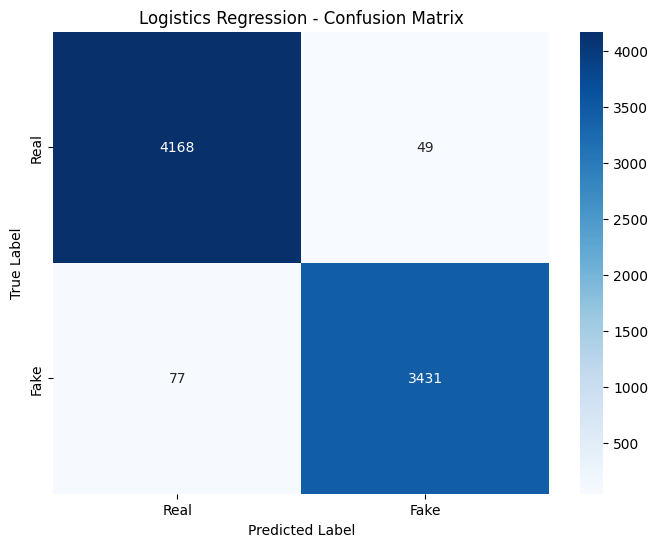

In [52]:
# Confusion Matrix (Logistics Regression)
cm_logi = confusion_matrix(y_test, y_pred_logi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logi, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistics Regression - Confusion Matrix')
plt.show()

In [ ]:
# Confusion Matrix (Decision Tree)
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

In [ ]:
# Confusion Matrix (Random Forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

ROC AUC Curve

# Chapter 10 - Model Evaluation

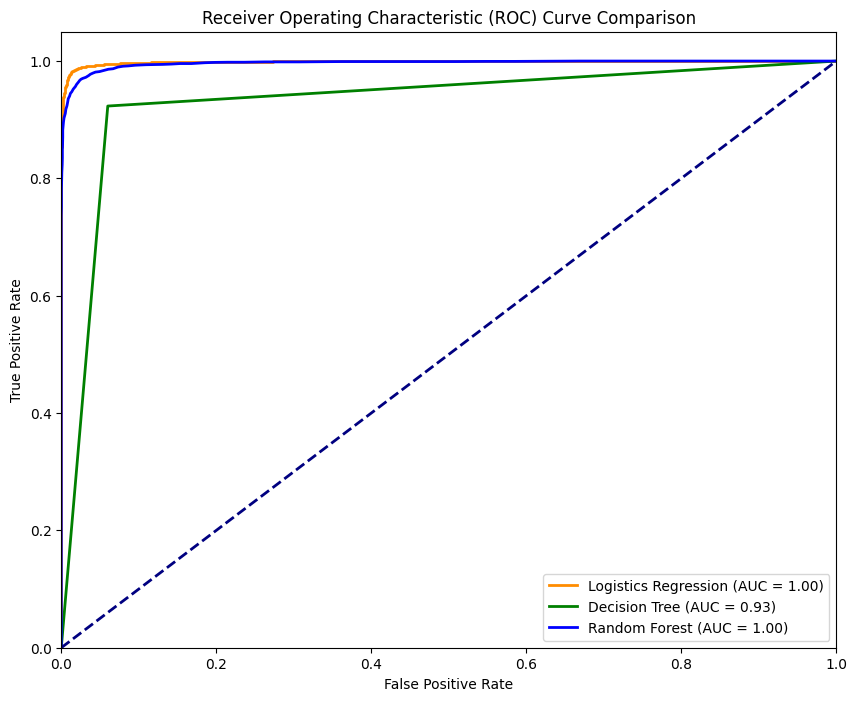

In [58]:
from sklearn.metrics import roc_curve, auc

# ROC & AUC Curve
y_prob_logi = logi_model.predict_proba(x_test)[:, 1]
y_prob_dt = dt_model.predict_proba(x_test)[:, 1]
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]

# ROC AUC Curve (Logistics Regression)
fpr_logi, tpr_logi, _ = roc_curve(y_test, y_prob_logi)
roc_auc_logi = auc(fpr_logi, tpr_logi)

# ROC AUC Curve (Decision Tree)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ROC AUC Curve (Random Forest)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Ploting the curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_logi, tpr_logi, color='darkorange', lw=2, label=f'Logistics Regression (AUC = {roc_auc_logi:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()

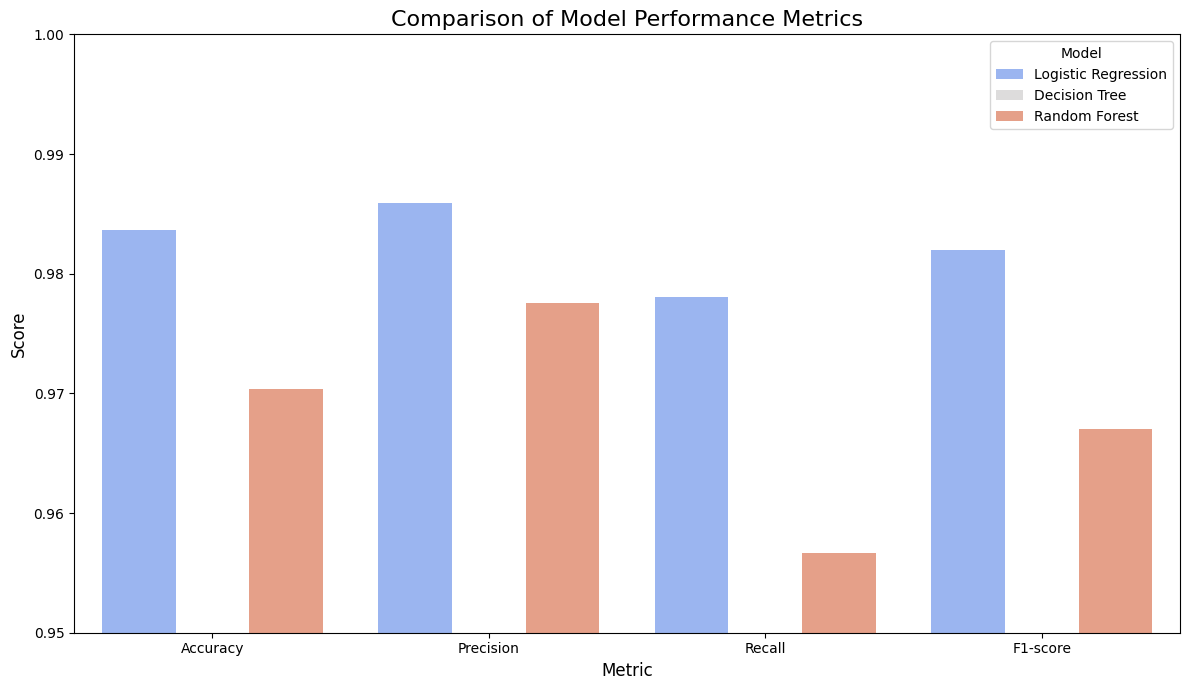

In [81]:
# Comparison between Accuracy, Precision, Recall, F1

model_predictions = {
    'Logistic Regression': y_pred_logi,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}

metrics_data = []
for model_name, y_pred in model_predictions.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    class_1_metrics = report.get('1', {})
    metrics_data.append({
        'Model': model_name,
        'Accuracy': report.get('accuracy', 0),
        'Precision': class_1_metrics.get('precision', 0),
        'Recall': class_1_metrics.get('recall', 0),
        'F1-score': class_1_metrics.get('f1-score', 0)
    })

df_metrics = pd.DataFrame(metrics_data)
df_metrics_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_metrics_melted, palette='coolwarm')
plt.title('Comparison of Model Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim([0.95, 1.0])
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Chapter 9 - Optimization

Grid Search

# Task
Generate Python code to compare different classification models using ROC AUC curves, calculate and compare accuracy, precision, recall, and F1-score for each model using a grouped bar chart (grouped by metric), and implement hyperparameter optimization for each model using Grid Search.

## Define parameter grids

### Subtask:
Define the hyperparameter search space for each model (Logistic Regression, Decision Tree, and Random Forest).


**Reasoning**:
Defining the hyperparameter grids for each model as requested in the instructions.



In [82]:
param_grid_logi = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20]
}

## Perform grid search

### Subtask:
Apply Grid Search with cross-validation to each model using the defined parameter grids.


**Reasoning**:
Apply Grid Search with cross-validation to each model using the defined parameter grids and store the best estimators.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid Search for Logistic Regression
grid_search_logi = GridSearchCV(logi_model, param_grid_logi, cv=5)
grid_search_logi.fit(x_train, y_train)
best_logi_model = grid_search_logi.best_estimator_

# Grid Search for Decision Tree
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5)
grid_search_dt.fit(x_train, y_train)
best_dt_model = grid_search_dt.best_estimator_

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(x_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

print("Grid search for all models complete. Best estimators stored.")